In [126]:
import sys
sys.version

'2.7.15 |Anaconda, Inc.| (default, Dec 10 2018, 21:57:18) [MSC v.1500 64 bit (AMD64)]'

In [172]:
import sys
!{sys.executable} -m pip install xgboost

  Using cached https://files.pythonhosted.org/packages/51/c1/198915b13e98b62a98f48309c41012638464651da755d941f4abe384c012/xgboost-0.82-py2.py3-none-win_amd64.whl


In [173]:
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime as dt
import xgboost as xgb
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import itertools

%matplotlib inline

In [134]:
data = pd.read_csv('C:\\Users\\Anup\\Desktop\\IPL\\train.csv')
data_test = pd.read_csv("C:\\Users\\Anup\\Desktop\\IPL\\test.csv")

In [26]:
df = pd.DataFrame(data)
df.head()

,Game ID,Team 1,Team 2,City,DayOfWeek,DateOfGame,TimeOfGame,AvgWindSpeed,AvgHumidity,"Inn 1 Team 1 NOP R>25,SR>125",...,"Inn 2 Team 2 NOP R<25, SR>125",Inn 2 Team 2 Total 4s,Inn 2 Team 2 Total 6s,Inn 2 Team 2 Max Strike Rate_ALLBatsmen,Inn 2 Team 1 NoP fast bowlers,Inn 2 Team 1 NoP Spinners,Inn 2 Team 1 wickets taken_catches_runout,Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 2 Team 1 Extras conceded in_wides_No Balls,"Winner (team 1=1, team 2=0)"
0,1,Koramangala Traffic Jammers,Whitefield Water Loggers,Whitefield,1,01-01-2012,20:00:00,6,0.49,1,...,0,3,3,120.00,5,0,6,4,11,1
1,2,Electronic City Power Savers,Silkboard Slow Movers,Silkboard,2,01-02-2012,17:00:00,7,0.44,3,...,2,18,9,215.15,4,1,4,0,5,1
2,3,Indranagar Pub Watchers,Sarjapur Water Tankers,Sarjapur,3,01-03-2012,20:30:00,11,0.23,2,...,1,18,1,300.00,3,3,0,1,10,0
3,4,Bellandur Froth Fighters,Koramangala Traffic Jammers,Koramangala,4,01-04-2012,16:00:00,6,0.61,0,...,0,5,4,100.00,4,2,3,2,16,0
4,5,Marathalli Chokers,Whitefield Water Loggers,Marathalli,5,01-05-2012,20:00:00,6,0.56,3,...,3,15,6,205.26,4,2,4,1,5,0


In [28]:
df.iloc[0]

Game ID                                                                                       1
Team 1                                                              Koramangala Traffic Jammers
Team 2                                                                Whitefield Water Loggers 
City                                                                                 Whitefield
DayOfWeek                                                                                     1
DateOfGame                                                                           01-01-2012
TimeOfGame                                                                             20:00:00
AvgWindSpeed                                                                                  6
AvgHumidity                                                                                0.49
Inn 1 Team 1 NOP R>25,SR>125                                                                  1
Inn 1 Team 1 NOP R<25, SR>125           

In [57]:
match_date = df['DateOfGame']
match_time = df['TimeOfGame']
match_fours_1 = df['Inn 1 Team 1 Total 4s']
match_sixes_1 = df['Inn 1 Team 1 Total 6s']

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%d/%m/%y').date()

In [144]:
data_test

,Game ID,Team 1,Team 2,CityOfGame,Day,DateOfGame,TimeOfGame,AvgWindSpeed,AvgHumidity,"Inn 1 Team 1 NOP R>25,SR>125",...,"Inn 2 Team 2 NOP R<25, SR>125",Inn 2 Team 2 Total 4s,Inn 2 Team 2 Total 6s,Inn 2 Team 2 Max Strike Rate_ALLBatsmen,Inn 2 Team 1 NoP fast bowlers,Inn 2 Team 1 NoP Spinners,Inn 2 Team 1 wickets taken_catches_runout,Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 2 Team 1 Extras conceded in_wides_No Balls,"Winner (team 1=1, team 2=0)"
0,253,Electronic City Power Savers,Marathalli Chokers,Electronic City,6,01-01-2016,20:00:00,5,0.62,1,...,0,9,5,142.85,3,3,1,1,3,0
1,254,Koramangala Traffic Jammers,Sarjapur Water Tankers,Koramangala,7,01-02-2016,20:00:00,6,0.66,1,...,1,8,4,210.00,3,2,1,1,1,0
2,255,HSR High Rent Payers,Marathalli Chokers,Marathalli,1,01-03-2016,16:00:00,5,0.64,0,...,1,8,1,166.66,4,2,2,7,4,1
3,256,Indranagar Pub Watchers,Silkboard Slow Movers,Indranagar,2,01-04-2016,20:00:00,5,0.64,1,...,3,14,4,166.66,2,4,6,3,2,1
4,257,Whitefield Water Loggers,Sarjapur Water Tankers,Whitefield,3,01-05-2016,16:00:00,5,0.62,2,...,2,13,2,160.00,4,2,6,1,2,1
5,258,Electronic City Power Savers,Bellandur Froth Fighters,Bellandur,4,01-06-2016,20:00:00,5,0.62,3,...,3,11,4,187.50,3,4,5,5,3,1
6,259,Indranagar Pub Watchers,Koramangala Traffic Jammers,Indranagar,5,01-07-2016,16:00:00,5,0.60,2,...,0,10,5,227.27,2,3,4,6,5,1
7,260,HSR High Rent Payers,Silkboard Slow Movers,HSR,6,01-08-2016,20:00:00,5,0.60,0,...,1,11,4,200.00,4,2,6,2,5,1
8,261,Bellandur Froth Fighters,Marathalli Chokers,HSR,7,01-09-2016,20:00:00,5,0.63,2,...,2,8,8,175.00,2,3,3,2,0,0
9,262,Koramangala Traffic Jammers,Whitefield Water Loggers,Whitefield,1,01-10-2016,16:00:00,5,0.64,2,...,2,8,3,166.66,4,1,6,3,8,1


In [145]:
df['home'] = 2 #not home not away
data_test['home'] = 2
for i in range(252):
    if df['Team 1'][i].split(" ")[0] == df['City'][i].split(" ")[0]:
        df['home'][i] = 1 #home
    elif df['Team 2'][i].split(" ")[0] == df['City'][i].split(" ")[0]:
        df['home'][i] = 0 #away
        
for i in range(76):
    if data_test['Team 1'][i].split(" ")[0] == data_test['CityOfGame'][i].split(" ")[0]:
        data_test['home'][i] = 1 #home
    elif data_test['Team 2'][i].split(" ")[0] == data_test['CityOfGame'][i].split(" ")[0]:
        data_test['home'][i] = 0 #away

C:\Users\Anup\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Anup\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Anup\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Anup\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: SettingWith

In [64]:
match_home_wins = df.loc[df['home'] == df['Winner (team 1=1, team 2=0)']] ##Home Wins by some team
match_home_played = df.loc[df['home']<2] #matches played by some team at home
features = df.shape[1]-2

home_win_percent = float(len(match_home_wins))/float(len(match_home_played)) * 100

In [65]:
home_win_percent #winning percent at home

56.97674418604651

In [66]:
print "Total number of matches: {}".format(len(match_home_played))
print "Number of features: {}".format(features)
print "Number of matches won by home team: {}".format(len(match_home_wins))
print "Win rate of home team: {:.2f}%".format(home_win_percent))

Total number of matches: 172
Number of features: 29
Number of matches won by home team: 98
Win rate of home team: 56.98%


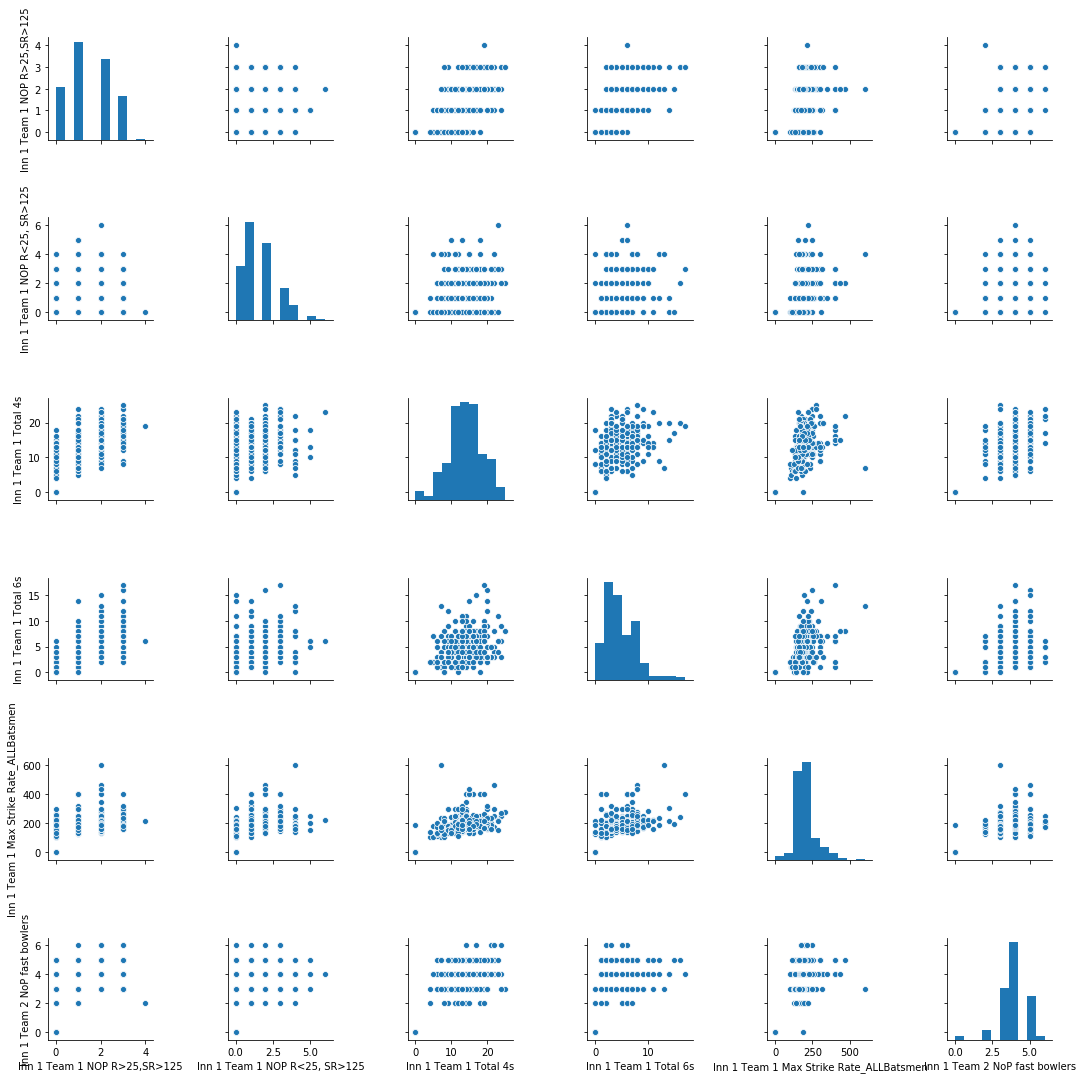

In [73]:
#data Visualisation
df_pair = df[['Inn 1 Team 1 NOP R>25,SR>125','Inn 1 Team 1 NOP R<25, SR>125','Inn 1 Team 1 Total 4s','Inn 1 Team 1 Total 6s','Inn 1 Team 1 Max Strike Rate_ALLBatsmen','Inn 1 Team 2 NoP fast bowlers']]
sns.pairplot(df_pair)

In [189]:
# Separate into feature set and target variable
x_final = df.drop(['Winner (team 1=1, team 2=0)','Team 1','Team 2','City', 'DateOfGame', 'TimeOfGame','DayOfWeek','Game ID'],1)
y_final = df['Winner (team 1=1, team 2=0)']

x_test = data_test.drop(['Winner (team 1=1, team 2=0)','Team 1','Team 2','CityOfGame','Day','DateOfGame', 'TimeOfGame','Game ID'],1)
y_test = data_test['Winner (team 1=1, team 2=0)']

In [191]:
# Standardising the data.
from sklearn.preprocessing import scale

for i in range(0,23):
    x_final.iloc[:,i] = scale(x_final.iloc[:,i])
    x_test.iloc[:,i] = scale(x_test.iloc[:,i])

C:\Users\Anup\Anaconda2\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Anup\Anaconda2\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [192]:
x_final.head()

,AvgWindSpeed,AvgHumidity,"Inn 1 Team 1 NOP R>25,SR>125","Inn 1 Team 1 NOP R<25, SR>125",Inn 1 Team 1 Total 4s,Inn 1 Team 1 Total 6s,Inn 1 Team 1 Max Strike Rate_ALLBatsmen,Inn 1 Team 2 NoP fast bowlers,Inn 1 Team 2 NoP Spinners,Inn 1 Team 2 wickets taken_catches_runout,...,"Inn 2 Team 2 NOP R<25, SR>125",Inn 2 Team 2 Total 4s,Inn 2 Team 2 Total 6s,Inn 2 Team 2 Max Strike Rate_ALLBatsmen,Inn 2 Team 1 NoP fast bowlers,Inn 2 Team 1 NoP Spinners,Inn 2 Team 1 wickets taken_catches_runout,Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 2 Team 1 Extras conceded in_wides_No Balls,home
0,-0.613313,-1.029230,-0.439706,-0.449442,0.273505,3.048818,0.256846,0.173806,-0.144115,-0.512867,...,-1.143265,-2.209723,-0.553083,-1.207632,1.327195,-2.201826,1.271752,1.187647,1.750749,-1.291415
1,-0.187542,-1.409867,1.593429,0.395777,1.347077,3.717488,0.682859,1.169239,-0.144115,-1.636714,...,0.685959,1.221975,1.630368,0.469604,0.325838,-1.176207,0.326379,-1.301227,-0.104284,-1.291415
2,1.515542,-3.008543,0.576862,0.395777,-0.155924,-0.628868,0.021335,0.173806,-1.125656,0.049057,...,-0.228653,1.221975,-1.280900,1.965280,-0.675519,0.875033,-1.564367,-0.679008,1.441577,-1.291415
3,-0.613313,-0.115702,-1.456273,0.395777,-1.658924,0.374137,-0.838719,-0.821628,0.837426,1.734827,...,-1.143265,-1.752164,-0.189175,-1.560178,0.325838,-0.150587,-0.146308,-0.056790,3.296610,-1.291415
4,-0.613313,-0.496339,1.593429,-0.449442,0.917649,0.039802,0.499094,1.169239,-1.125656,0.049057,...,1.600570,0.535635,0.538642,0.295270,0.325838,-0.150587,0.326379,-0.679008,-0.104284,-0.020178


In [193]:
x_test.head()

,AvgWindSpeed,AvgHumidity,"Inn 1 Team 1 NOP R>25,SR>125","Inn 1 Team 1 NOP R<25, SR>125",Inn 1 Team 1 Total 4s,Inn 1 Team 1 Total 6s,Inn 1 Team 1 Max Strike Rate_ALLBatsmen,Inn 1 Team 2 NoP fast bowlers,Inn 1 Team 2 NoP Spinners,Inn 1 Team 2 wickets taken_catches_runout,...,"Inn 2 Team 2 NOP R<25, SR>125",Inn 2 Team 2 Total 4s,Inn 2 Team 2 Total 6s,Inn 2 Team 2 Max Strike Rate_ALLBatsmen,Inn 2 Team 1 NoP fast bowlers,Inn 2 Team 1 NoP Spinners,Inn 2 Team 1 wickets taken_catches_runout,Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 2 Team 1 Extras conceded in_wides_No Balls,home
0,-1.319581,-0.553198,-0.353684,-0.307554,-1.416154,-1.362170,-0.642941,0.335323,-0.159901,2.758142,...,-1.167858,-0.782709,0.186066,-0.682644,-0.291507,0.724759,-1.289864,-0.672842,-0.399696,0.570597
1,-0.603237,-0.003616,-0.353684,1.423860,-1.416154,-0.051728,-0.026376,-0.644853,0.852803,-0.339673,...,-0.346032,-1.024522,-0.158837,0.250534,-0.291507,-0.208829,-1.289864,-0.672842,-1.067320,0.570597
2,-1.319581,-0.278407,-1.387530,0.558153,-0.391128,-1.362170,-0.574502,0.335323,-0.159901,0.176630,...,-0.346032,-1.024522,-1.193545,-0.351758,0.594674,-0.208829,-0.759974,2.736224,-0.065884,-0.978167
3,-1.319581,-0.278407,-0.353684,1.423860,2.068934,-0.706949,2.028757,0.335323,-0.159901,-1.372278,...,1.297620,0.426354,-0.158837,-0.351758,-1.177687,1.658347,1.359587,0.463513,-0.733508,0.570597
4,-1.319581,-0.553198,0.680162,-1.173261,0.223887,-0.051728,-0.545647,0.335323,-0.159901,1.209235,...,0.475794,0.184541,-0.848642,-0.444312,0.594674,-0.208829,1.359587,-0.672842,-0.733508,0.570597


In [194]:
def preprocess_features(X):
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)
    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

x_final = preprocess_features(x_final)
print "Processed feature columns ({} total features):\n{}".format(len(x_final.columns), list(x_final.columns))


Processed feature columns (23 total features):
['AvgWindSpeed', 'AvgHumidity', 'Inn 1 Team 1 NOP R>25,SR>125', 'Inn 1 Team 1 NOP R<25, SR>125', 'Inn 1 Team 1 Total 4s', 'Inn 1 Team 1 Total 6s', 'Inn 1 Team 1 Max Strike Rate_ALLBatsmen', 'Inn 1 Team 2 NoP fast bowlers', 'Inn 1 Team 2 NoP Spinners', 'Inn 1 Team 2 wickets taken_catches_runout', 'Inn1 Team 2 wickets taken_ bowled _lbw_caught by keeper_stumping', 'Inn 1 Team 2 Extras conceded in_wides_No Balls', 'Inn 2 Team 2 NOP R>25,SR>125', 'Inn 2 Team 2 NOP R<25, SR>125', 'Inn 2 Team 2 Total 4s', 'Inn 2 Team 2 Total 6s', 'Inn 2 Team 2 Max Strike Rate_ALLBatsmen', 'Inn 2 Team 1 NoP fast bowlers', 'Inn 2 Team 1 NoP Spinners', 'Inn 2 Team 1 wickets taken_catches_runout', 'Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping', 'Inn 2 Team 1 Extras conceded in_wides_No Balls', 'home']


In [195]:
x_final.head()

,AvgWindSpeed,AvgHumidity,"Inn 1 Team 1 NOP R>25,SR>125","Inn 1 Team 1 NOP R<25, SR>125",Inn 1 Team 1 Total 4s,Inn 1 Team 1 Total 6s,Inn 1 Team 1 Max Strike Rate_ALLBatsmen,Inn 1 Team 2 NoP fast bowlers,Inn 1 Team 2 NoP Spinners,Inn 1 Team 2 wickets taken_catches_runout,...,"Inn 2 Team 2 NOP R<25, SR>125",Inn 2 Team 2 Total 4s,Inn 2 Team 2 Total 6s,Inn 2 Team 2 Max Strike Rate_ALLBatsmen,Inn 2 Team 1 NoP fast bowlers,Inn 2 Team 1 NoP Spinners,Inn 2 Team 1 wickets taken_catches_runout,Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 2 Team 1 Extras conceded in_wides_No Balls,home
0,-0.613313,-1.029230,-0.439706,-0.449442,0.273505,3.048818,0.256846,0.173806,-0.144115,-0.512867,...,-1.143265,-2.209723,-0.553083,-1.207632,1.327195,-2.201826,1.271752,1.187647,1.750749,-1.291415
1,-0.187542,-1.409867,1.593429,0.395777,1.347077,3.717488,0.682859,1.169239,-0.144115,-1.636714,...,0.685959,1.221975,1.630368,0.469604,0.325838,-1.176207,0.326379,-1.301227,-0.104284,-1.291415
2,1.515542,-3.008543,0.576862,0.395777,-0.155924,-0.628868,0.021335,0.173806,-1.125656,0.049057,...,-0.228653,1.221975,-1.280900,1.965280,-0.675519,0.875033,-1.564367,-0.679008,1.441577,-1.291415
3,-0.613313,-0.115702,-1.456273,0.395777,-1.658924,0.374137,-0.838719,-0.821628,0.837426,1.734827,...,-1.143265,-1.752164,-0.189175,-1.560178,0.325838,-0.150587,-0.146308,-0.056790,3.296610,-1.291415
4,-0.613313,-0.496339,1.593429,-0.449442,0.917649,0.039802,0.499094,1.169239,-1.125656,0.049057,...,1.600570,0.535635,0.538642,0.295270,0.325838,-0.150587,0.326379,-0.679008,-0.104284,-0.020178


In [206]:
#Training Data
models = [('LR',LogisticRegression()),('KNN',KNeighborsClassifier()),('SVM',SVC())]
for name,model in models:
    k_fold = sklearn.model_selection.KFold(n_splits=10)
    cv_results = sklearn.model_selection.cross_val_score(model,x_final,y_final,cv=k_fold,scoring="accuracy")
    msg = "%s:%f, %f" % (name,cv_results.mean(),cv_results.std())
    print(msg)

LR:0.932615, 0.061990
KNN:0.837538, 0.062311
SVM:0.913231, 0.076293


In [228]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_test = np.array(y_test)

for name,model in models:
    print(name)
    model.fit(x_final,y_final)
    predictions = model.predict(x_test)
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test,predictions))

LR
0.9210526315789473
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        42
           1       0.97      0.85      0.91        34

   micro avg       0.92      0.92      0.92        76
   macro avg       0.93      0.91      0.92        76
weighted avg       0.93      0.92      0.92        76

KNN
0.8421052631578947
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        42
           1       0.89      0.74      0.81        34

   micro avg       0.84      0.84      0.84        76
   macro avg       0.85      0.83      0.84        76
weighted avg       0.85      0.84      0.84        76

SVM
0.9078947368421053
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        42
           1       0.97      0.82      0.89        34

   micro avg       0.91      0.91      0.91        76
   macro avg       0.92      0.90      0.91        76
weight

In [217]:
#trying XGBoost
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
x_final.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_final.columns.values]

# fit model no training data
model = xgb.XGBClassifier()
model.fit(x_final, y_final)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [218]:
#predicting data
x_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_test.columns.values]

predictions = model.predict(x_test)
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

0.8947368421052632
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.88      0.88      0.88        34

   micro avg       0.89      0.89      0.89        76
   macro avg       0.89      0.89      0.89        76
weighted avg       0.89      0.89      0.89        76



In [ ]:
## Logistic Regression gave best accuracy

In [219]:
#improving xgboost

In [231]:
from sklearn.model_selection import GridSearchCV

# TODO: Create the parameters list you wish to tune
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  


clf = xgb.XGBClassifier()

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf,
                        scoring='accuracy',
                        param_grid=parameters,
                        cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(x_final,y_final)


C:\Users\Anup\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [224]:
clf = grid_obj.best_estimator_
print clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=3, missing=None,
       n_estimators=40, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=1e-05,
       reg_lambda=1, scale_pos_weight=1, seed=2, silent=True,
       subsample=0.8)


In [225]:
#predicting data
x_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_test.columns.values]

predictions = clf.predict(x_test)
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

0.8947368421052632
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.88      0.88      0.88        34

   micro avg       0.89      0.89      0.89        76
   macro avg       0.89      0.89      0.89        76
weighted avg       0.89      0.89      0.89        76



In [226]:
#Model we will use to predict Winner is Logistic Regression

In [232]:
model = LogisticRegression()
model.fit(x_final,y_final)
predictions = model.predict(x_test)
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

0.9210526315789473
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        42
           1       0.97      0.85      0.91        34

   micro avg       0.92      0.92      0.92        76
   macro avg       0.93      0.91      0.92        76
weighted avg       0.93      0.92      0.92        76



In [233]:
Accuracy = accuracy_score(y_test,predictions) * 100
print("Accuracy of the Prediction Model is "+str(Accuracy)"")

Accuracy of the Prediction Model is 92.10526315789474
